In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_excel("p34.xlsx")

In [3]:
# Exibir as primeiras linhas do dataframe
df.head()

,cliente,ECIV,ESCOLARIDADE,IDADE,NATUREZA,PROFISSAO,SEXO,RENDA,UF,STATUS
0,C_12664,casado,secundario,18,1,9,F,14.69,SP,bom
1,C_9694,casado,secundario,18,5,9,M,40.35,SP,bom
2,C_10624,casado,superior,18,1,8,F,24.16,SP,bom
3,C_12230,casado,pos_grad,18,1,8,M,20.74,SP,bom
4,C_21910,casado,secundario,18,1,3,F,50.19,SP,bom


In [4]:
# Verificar valores nulos
print("Valores nulos por coluna:\n", df.isnull().sum())

Valores nulos por coluna:
 cliente         0
ECIV            0
ESCOLARIDADE    0
IDADE           0
NATUREZA        0
PROFISSAO       0
SEXO            0
RENDA           0
UF              0
STATUS          0
dtype: int64


In [5]:
# Unindo estados com menos de 20 registros na categoria "Outros"
counts = df["UF"].value_counts()

small = counts[counts < 20].index

df["UF"] = df["UF"].where(~df["UF"].isin(small), "Outros")
df["UF"].value_counts()

UF
SP        33451
MG         1841
Outros       39
Name: count, dtype: int64

In [6]:
# Garantir que colunas categóricas sejam strings
for col in ["NATUREZA", "PROFISSAO"]:
    df[col] = df[col].astype(str)

In [7]:
# Remover outliers
from scipy import stats


num_cols = df.select_dtypes(include=[np.number]).columns
z_scores = np.abs(stats.zscore(df[num_cols], nan_policy="omit"))
df_clean = df[(z_scores < 3).all(axis=1)]

In [8]:
# Codificação das variáveis categóricas
label_encoders = {}
for col in ["ECIV", "ESCOLARIDADE", "NATUREZA", "PROFISSAO", "SEXO", "UF", "STATUS"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
print(label_encoders)

{'ECIV': LabelEncoder(), 'ESCOLARIDADE': LabelEncoder(), 'NATUREZA': LabelEncoder(), 'PROFISSAO': LabelEncoder(), 'SEXO': LabelEncoder(), 'UF': LabelEncoder(), 'STATUS': LabelEncoder()}


In [10]:
# Separar variáveis independentes e dependentes
X = df.drop(["cliente ", "STATUS"], axis=1)
y = df["STATUS"]

# 5. Divide os dados em conjunto de treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [12]:
# 6. Cria e treina o modelo de regressão logística
# modelo = LogisticRegression()
modelo = LogisticRegression(class_weight="balanced", max_iter=500)
modelo.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


In [13]:
# 7. Faz previsões com os dados de teste
y_pred = modelo.predict(X_test)

# 8. Exibe métricas de avaliação
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))  # mostra erros/acertos

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))  # precisão, recall, f1-score

# 9. Mostra os coeficientes aprendidos para cada variável
print("\nCoeficientes do modelo:")
for var, coef in zip(X.columns, modelo.coef_[0]):
    print(f"{var}: {coef:.4f}")

# 10. Exibe o intercepto (bias)
print(f"\nIntercepto: {modelo.intercept_[0]:.4f}")

Matriz de Confusão:
[[3867  735]
 [ 271 2194]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.93      0.84      0.88      4602
           1       0.75      0.89      0.81      2465

    accuracy                           0.86      7067
   macro avg       0.84      0.87      0.85      7067
weighted avg       0.87      0.86      0.86      7067


Coeficientes do modelo:
ECIV: -0.0396
ESCOLARIDADE: -0.0773
IDADE: 0.2116
NATUREZA: 0.0322
PROFISSAO: 0.0432
SEXO: -0.0706
RENDA: 0.0018
UF: 0.0268

Intercepto: -10.3638


In [14]:
df.head()

,cliente,ECIV,ESCOLARIDADE,IDADE,NATUREZA,PROFISSAO,SEXO,RENDA,UF,STATUS
0,C_12664,0,2,18,0,7,0,14.69,2,0
1,C_9694,0,2,18,4,7,1,40.35,2,0
2,C_10624,0,3,18,0,6,0,24.16,2,0
3,C_12230,0,0,18,0,6,1,20.74,2,0
4,C_21910,0,2,18,0,2,0,50.19,2,0


In [18]:
print("Codificação de STATUS:")
print(label_encoders['STATUS'].classes_)

Codificação de STATUS:
['bom' 'mau']


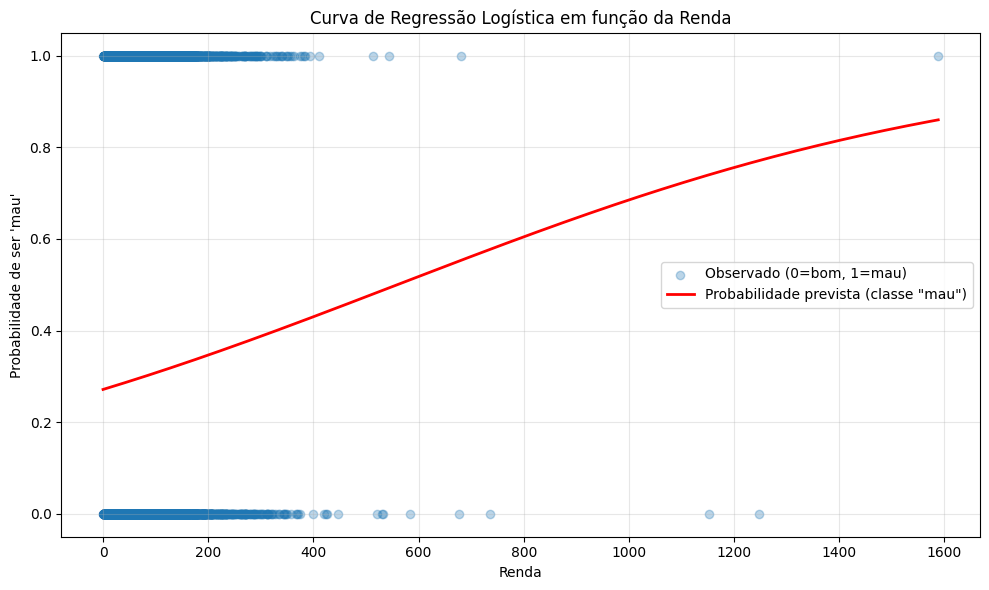

In [17]:
# 11. Gráfico da curva logística com base em RENDA
# Fixamos todas as outras variáveis na moda (categóricas) ou média (numéricas)
idade_mean = df["IDADE"].mean()

# Para variáveis categóricas, usamos a moda (valor mais frequente)
eciv_mode = df["ECIV"].mode()[0]
escolaridade_mode = df["ESCOLARIDADE"].mode()[0]
natureza_mode = df["NATUREZA"].mode()[0]
profissao_mode = df["PROFISSAO"].mode()[0]
sexo_mode = df["SEXO"].mode()[0]
uf_mode = df["UF"].mode()[0]

# Geração de uma faixa de valores para RENDA
renda = np.linspace(df["RENDA"].min(), df["RENDA"].max(), 300)

# Construção do conjunto de entrada NA ORDEM EXATA DAS COLUNAS
# (excluindo 'cliente' e 'STATUS' que não são features)
X_plot = pd.DataFrame({
    "ECIV": eciv_mode,
    "ESCOLARIDADE": escolaridade_mode,
    "IDADE": idade_mean,
    "NATUREZA": natureza_mode,
    "PROFISSAO": profissao_mode,
    "SEXO": sexo_mode,
    "RENDA": renda,
    "UF": uf_mode
})

# Garantir a ordem correta das colunas (mesma do treinamento)
X_plot = X_plot[modelo.feature_names_in_]

# Cálculo das probabilidades previstas de ser "mau" (STATUS=1)
probs = modelo.predict_proba(X_plot)[:, 1]

# Gráfico
plt.figure(figsize=(10, 6))
plt.scatter(df["RENDA"], df["STATUS"], alpha=0.3, label="Observado (0=bom, 1=mau)")
plt.plot(renda, probs, color="red", linewidth=2, label='Probabilidade prevista (classe "mau")')
plt.title("Curva de Regressão Logística em função da Renda")
plt.xlabel("Renda")
plt.ylabel("Probabilidade de ser 'mau'")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()